## Tilted Frame

In [2]:
import math as m
import matplotlib.pyplot as plt
import sympy as sym
from sympy import Symbol, Matrix, cos, sin, init_printing, simplify, diff
from sympy import *
from math import pi
from fractions import Fraction
from sympy.physics.vector import dynamicsymbols
from sympy.physics.mechanics import *
from sympy.functions import transpose
sym.init_printing(use_latex='mathjax')
init_vprinting() # Use dots for time derivatives

# Symbols
M = Symbol('M')
m = Symbol('m')
R = Symbol('R')
g = Symbol('g')
t = Symbol('t')
theta, phi, psi, x, y, z = dynamicsymbols('theta phi psi x y z')

# Time derivatives of symbols
thetad, phid, psid, xd, yd, zd = dynamicsymbols('theta phi psi x y z', 1)

#### Angular velocity in tilted frame

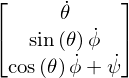

In [3]:
omegaT = Matrix([thetad, phid*sin(theta), phid*cos(theta)+psid])
omegaT

Transpose of the angular velocity

In [4]:
omegaT_T = transpose(omegaT)
omegaT_T

## Question 2
#### Moment of inertia tensor

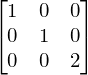

In [5]:
I2 = Matrix([ [1, 0, 0], [0, 1, 0], [0, 0, 2] ]) # Remember to multiply by 1/4 MR^2 !!!
I2

#### Kinetic energy

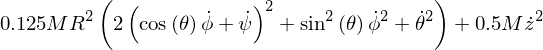

In [6]:
T2R = (omegaT_T*I2*omegaT).simplify()
T2r = T2R[0].simplify() # Remember to multiply by (1/2)(1/4)(MR^2 omega^2) !!!
T2 = (1/8)*M*(R**2)*T2r + 0.5*M*zd**2
T2

#### Potential energy

In [7]:
V2 = M*g*R*cos(theta)
V2

#### Lagrangian

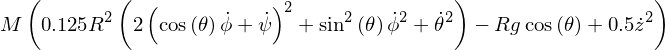

In [8]:
L2 = (T2 - V2).simplify()
L2

#### Equations of motion

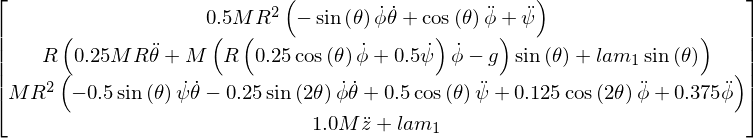

In [9]:
LM2 = LagrangesMethod(L2, [psi, theta, phi, z], nonhol_coneqs=[zd + thetad*R*sin(theta)])
EoM2 = LM2.form_lagranges_equations()

# Simplfy the equations of motion
EOM2 = Matrix([EoM2[0].simplify(), EoM2[1].simplify(), EoM2[2].simplify(), EoM2[3].simplify()])
EOM2

## Question 3
#### Matrix to translate the ring

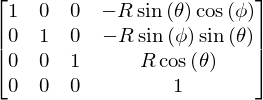

In [10]:
A = Matrix([ [1, 0, 0, -R*sin(theta)*cos(phi)], [0, 1, 0, -R*sin(theta)*sin(phi)], [0, 0, 1, R*cos(theta)], [0, 0, 0, 1] ])
A

#### Moment of inertia tensor

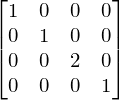

In [11]:
I3 = I2 # Remember to multiply by 1/2 MR^2 !!!
I31 = I3.row_insert(3, Matrix([[0, 0, 0]]))
I32 = I31.col_insert(3, Matrix([0, 0, 0, 1]))
I32

#### Shifted moment of inertia tensor 

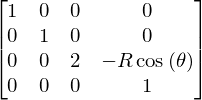

In [12]:
I3_new = (A*I32*(A**-1))
I3_new

#### Angular velocity in tilted frame

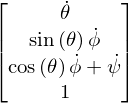

In [13]:
omega3 = omegaT.row_insert(3, Matrix([1]))
omega3T = transpose(omega3)
omega3

#### Kinetic energy

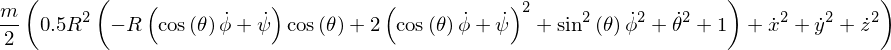

In [14]:
T3r = (omega3T*I3_new*omega3).simplify()
T3R = T3r[0] # This is just the kinetic energy from rotation
T3 = ((1/4)*m*R**2 * T3R + (m/2)*(xd**2 + yd**2 + zd**2)).simplify()
T3

#### Potential energy

In [15]:
V3 = m*g*z
V3

#### Lagrangian

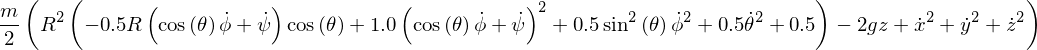

In [16]:
L3 = (T3 - V3).simplify()
L3

#### Equations of motion (without the holonomic constrants. Will add later by hand) 

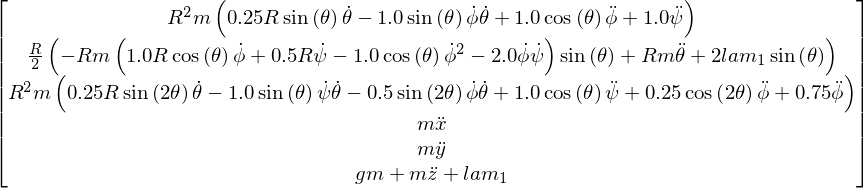

In [17]:
LM3 = LagrangesMethod(L3, [psi, theta, phi, x, y, z], nonhol_coneqs=[zd + thetad*R*sin(theta)])
EoM3 = LM3.form_lagranges_equations()

# Simplfy the equations of motion
EOM3 = Matrix([EoM3[0].simplify(), EoM3[1].simplify(), EoM3[2].simplify(), EoM3[3].simplify(), EoM3[4].simplify(), EoM3[5].simplify()])
EOM3